In [2]:
import Computations
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = {
    "Shift": [],
    'Slide': [],
    'Rise': [],
    'Tilt': [],
    'Roll': [],
    'Twist': []
}
df = pd.DataFrame(data)

In [4]:
def get_df(str):
    dim_df = df
    tet_df= df

    files = os.listdir(str)
    dim  = list(filter(lambda s: True if "dimer_opt.par" in s else False,files))
    tet = list(filter(lambda s: True if "tetramer_opt.par" in s else False,files))

    for d,t in zip(dim,tet):


        fp_dim = os.path.join(str, d)
        fp_tet = os.path.join(str, t)

        n_dim = int((re.findall("\d+", d))[2])
        n_tet = int((re.findall("\d+", t))[2])

        shift_dim = pd.Series(data = {'Shift': n_dim}, index = ["Shift"])
        shift_tet = pd.Series(data = {'Shift': n_tet}, index = ["Shift"])

        series_dim= Computations.get_means(fp_dim)
        series_tet= Computations.get_means(fp_tet)

        series_dim = pd.concat([shift_dim, series_dim])
        series_tet = pd.concat([shift_tet, series_tet])

        dim_df = pd.concat([dim_df, series_dim.to_frame().transpose()], ignore_index= True)
        tet_df = pd.concat([tet_df, series_tet.to_frame().transpose()], ignore_index= True)




        # fp = os.path.join(str, f)
        # n = int((re.findall("\d+", f))[2])
        # shift = pd.Series(data = {'Shift': n}, index = ["Shift"])
        # series = Computations.get_means(fp)
        # series = pd.concat([shift, series])

        
        
    dim_df = dim_df.sort_values(by = "Shift")
    dim_df = dim_df.reset_index(drop=True)

    tet_df = tet_df.sort_values(by = "Shift")
    tet_df = tet_df.reset_index(drop=True)

    return dim_df, tet_df

In [5]:
a1f1_dim, a1f1_tet = get_df("Bodhi_TAL_A1/a1f1_tal")
a1f2_dim, a1f2_tet = get_df("Bodhi_TAL_A1/a1f2_tal")
a2f1_dim, a2f1_tet = get_df("Kabir_TAL_A2/a2f1_tal")
a2f2_dim, a2f2_tet = get_df("Kabir_TAL_A2/a2f2_tal")
p1f1_dim, p1f1_tet = get_df("Ananth_TAL_P1/p1f1_tal")
p1f2_dim, p1f2_tet = get_df("Ananth_TAL_P1/p1f2_tal")
p2f1_dim, p2f1_tet = get_df("Rohit_TAL_P2/p2f1_tal")
p2f2_dim, p2f2_tet = get_df("Rohit_TAL_P2/p2f2_tal")

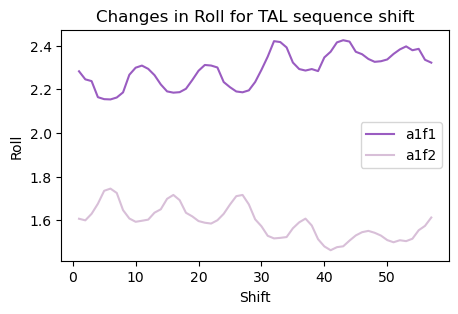

In [49]:

colors = ["#9A5CC1", "#D8BFD8"]
plt.figure(figsize=(5,3))
sns.lineplot(x = "Shift", y= "Roll", data = a1f1_dim, color =colors[0], label ='a1f1')
sns.lineplot(x = "Shift", y= "Roll", data = a1f2_dim,  color =colors[1],label ='a1f2')
plt.legend()
# plt.title("Changes in Roll for TAL sequence shift")
plt.savefig('TalRoll.png')
plt.show()

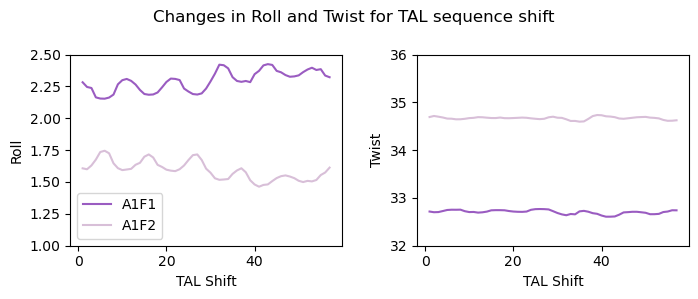

<Figure size 640x480 with 0 Axes>

In [89]:
fig, axes = plt.subplots(1,2, figsize=(7,3))
sns.lineplot(ax = axes[0], x = "Shift", y= "Roll", data = a1f1_dim, color =colors[0], label ='A1F1')
sns.lineplot(ax = axes[0],x = "Shift", y= "Roll", data = a1f2_dim,  color =colors[1],label ='A1F2')

sns.lineplot(ax = axes[1],x = "Shift", y= "Twist", data = a1f1_dim, color =colors[0], label ='A1F1')
sns.lineplot(ax = axes[1],x = "Shift", y= "Twist", data = a1f2_dim,  color =colors[1],label ='A1F2')


axes[0].set_xlabel("TAL Shift")
axes[1].set_xlabel("TAL Shift")


axes[0].set_ylim(1,2.5)
axes[1].set_ylim(32,36)
axes[1].legend_.remove()

plt.suptitle("Changes in Roll and Twist for TAL sequence shift")

plt.tight_layout()
plt.show()
plt.clf()

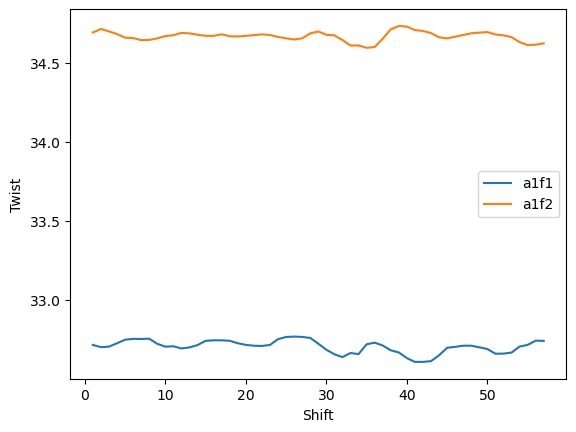

In [92]:
sns.lineplot(x = "Shift", y= "Twist", data = a1f1_dim, label ='a1f1')
sns.lineplot(x = "Shift", y= "Twist", data = a1f2_dim, label ='a1f2')
plt.legend()
plt.show()



In [ ]:
# Shifts every 10.5 bp, 